# Disease Prediction



## Setup and initialization

In [1]:
#from google.colab import drive
#drive.mount('/content/drive')

In [2]:
import random
import numpy as np
import tensorflow as tf

from tensorflow.keras import layers
from tensorflow.keras import regularizers
from sklearn.model_selection import train_test_split

print(tf.__version__)

seed = 299;
# let's set the random seed to make the results reproducible

random.seed(seed)
np.random.seed(seed)
tf.random.set_seed(seed)

2.10.0


In [3]:
#!pip install git+https://github.com/tensorflow/docs

try:
  import tensorflow_docs as tfdocs
  import tensorflow_docs.modeling
  import tensorflow_docs.plots
except:
  !pip install git+https://github.com/tensorflow/docs
  import tensorflow_docs as tfdocs
  import tensorflow_docs.modeling
  import tensorflow_docs.plots
  

In [4]:
from  IPython import display
from matplotlib import pyplot as plt

import numpy as np

import pathlib
import shutil
import tempfile

In [5]:
# currentdir
import os

logdir = os.path.join(os.getcwd(), "tensorboard_logs")
shutil.rmtree(logdir, ignore_errors=True)

## 1. Dataset Preparation

In [6]:
import pandas as pd


disease_training = pd.read_csv('https://raw.githubusercontent.com/whaldsz/deep-learning/main/Disease_Prediction/Training.csv')
disease_testing = pd.read_csv('https://raw.githubusercontent.com/whaldsz/deep-learning/main/Disease_Prediction/Testing.csv')
disease_training.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis,Unnamed: 133
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN


In [7]:
print(disease_training.shape)
print(disease_testing.shape)

(4920, 134)
(42, 133)


## 3 Remove last column

In [8]:
disease_training.isna().sum()

itching                    0
skin_rash                  0
nodal_skin_eruptions       0
continuous_sneezing        0
shivering                  0
                        ... 
blister                    0
red_sore_around_nose       0
yellow_crust_ooze          0
prognosis                  0
Unnamed: 133            4920
Length: 134, dtype: int64

In [9]:
disease_training.drop('Unnamed: 133', inplace=True, axis=1)

disease_training.isna().sum()

itching                 0
skin_rash               0
nodal_skin_eruptions    0
continuous_sneezing     0
shivering               0
                       ..
inflammatory_nails      0
blister                 0
red_sore_around_nose    0
yellow_crust_ooze       0
prognosis               0
Length: 133, dtype: int64

In [10]:
#disease_training.head()

## Convert category to numeric values

In [11]:
#get class labels

class_names = np.unique(disease_training.prognosis)
disease_training.prognosis = pd.Categorical(disease_training.prognosis)
disease_testing.prognosis = pd.Categorical(disease_testing.prognosis)

In [12]:
#disease_training.prognosis.cat.codes
#disease_training
#disease_testing.head()

# list class names
class_names[:,None]

array([['(vertigo) Paroymsal  Positional Vertigo'],
       ['AIDS'],
       ['Acne'],
       ['Alcoholic hepatitis'],
       ['Allergy'],
       ['Arthritis'],
       ['Bronchial Asthma'],
       ['Cervical spondylosis'],
       ['Chicken pox'],
       ['Chronic cholestasis'],
       ['Common Cold'],
       ['Dengue'],
       ['Diabetes '],
       ['Dimorphic hemmorhoids(piles)'],
       ['Drug Reaction'],
       ['Fungal infection'],
       ['GERD'],
       ['Gastroenteritis'],
       ['Heart attack'],
       ['Hepatitis B'],
       ['Hepatitis C'],
       ['Hepatitis D'],
       ['Hepatitis E'],
       ['Hypertension '],
       ['Hyperthyroidism'],
       ['Hypoglycemia'],
       ['Hypothyroidism'],
       ['Impetigo'],
       ['Jaundice'],
       ['Malaria'],
       ['Migraine'],
       ['Osteoarthristis'],
       ['Paralysis (brain hemorrhage)'],
       ['Peptic ulcer diseae'],
       ['Pneumonia'],
       ['Psoriasis'],
       ['Tuberculosis'],
       ['Typhoid'],
       ['Urinary

## Separate Features and Label - Training

### Training Set

In [13]:
X = disease_training.drop('prognosis', axis=1)
y = disease_training.prognosis.cat.codes
np.unique(y)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40], dtype=int8)

### Unseen Test Set

In [14]:
X_unseen = disease_testing.drop('prognosis', axis=1)
y_unseen = disease_testing.prognosis.cat.codes
np.unique(X_unseen)

array([0, 1], dtype=int64)

## Split into Training & Validation Test

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=74)
#print(X_train.shape)
#print(y_train.shape)
#print(X_test.shape)
#print(y_test.shape)


In [16]:
X_train.shape, X_test.shape

((3936, 132), (984, 132))

In [17]:
# Number of features
FEATURES = 132
FEATURES

132

## 2. Model Training

### Training configuration

In [18]:
FEATURES=X_train.shape[1]
N_VALIDATION = X_train.shape[0] *.2 #int(1e3)
N_TRAIN = X_train.shape[0]*.8 #int(1e4)
BUFFER_SIZE = int(100)
BATCH_SIZE = 50
STEPS_PER_EPOCH = N_TRAIN//BATCH_SIZE

[FEATURES, N_VALIDATION, N_TRAIN, BUFFER_SIZE, BATCH_SIZE, STEPS_PER_EPOCH]

[132, 787.2, 3148.8, 100, 50, 62.0]

### Create Model

### Find the ideal learning rate

In [19]:
lr_schedule = tf.keras.optimizers.schedules.InverseTimeDecay(
  0.001,
  decay_steps=STEPS_PER_EPOCH*100,
  decay_rate=1,
  staircase=False)

def get_optimizer():
  return tf.keras.optimizers.Adam(lr_schedule)

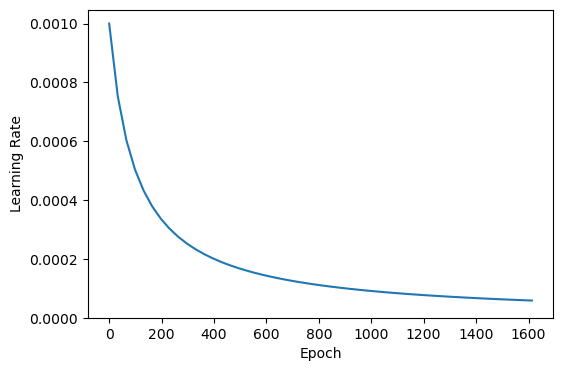

In [20]:
step = np.linspace(0,100000)
lr = lr_schedule(step)
plt.figure(figsize = (6,4))
plt.plot(step/STEPS_PER_EPOCH, lr)
plt.ylim([0,max(plt.ylim())])
plt.xlabel('Epoch')
_ = plt.ylabel('Learning Rate')

In [21]:

#metrics = [
#    tfma.metrics.ExampleCount(name='example_count'),
#    tf.keras.metrics.SparseCategoricalCrossentropy(
#        name='sparse_categorical_crossentropy'),
#    tf.keras.metrics.SparseCategoricalAccuracy(name='accuracy'),
#    tf.keras.metrics.Precision(name='precision', top_k=1),
#    tf.keras.metrics.Precision(name='precision', top_k=3),
#    tf.keras.metrics.Recall(name='recall', top_k=1),
#    tf.keras.metrics.Recall(name='recall', top_k=3),
#    tfma.metrics.MultiClassConfusionMatrixPlot(
#        name='multi_class_confusion_matrix_plot'),
#]

METRICS = 'accuracy'
LOSS = tf.keras.losses.SparseCategoricalCrossentropy()

### Settings for automation

In [22]:
def get_callbacks(name):
  return [
    tfdocs.modeling.EpochDots(),
    tf.keras.callbacks.EarlyStopping(monitor='acc', patience=100),
    tf.keras.callbacks.TensorBoard(os.path.join(logdir,name)),
  ]

In [23]:
def compile_and_fit(model, name, loss=None, optimizer=None, metrics = None, max_epochs=10000):
  if optimizer is None:
    optimizer = get_optimizer()

  if loss is None:
    loss = LOSS
  if metrics is None:
    metrics = [METRICS]

  model.compile(
      optimizer=optimizer,
      loss=loss,
      metrics=metrics
  )

  model.summary()

  history = model.fit(
    X_train,
    y_train,
    steps_per_epoch = STEPS_PER_EPOCH,
    epochs=max_epochs,
    validation_split=0.1,
    #validation_data=[X_test, y_test],
    callbacks=get_callbacks(name),
    verbose=0)
  return history

### Models

In [24]:
size_histories = {}

#Model 1
model1 = tf.keras.Sequential([
    layers.Dense(41, activation='elu', input_shape=(FEATURES,)),
    layers.Dense(41, activation=tf.keras.activations.softmax)
])

#Model 2
model2 = tf.keras.Sequential([
    layers.Dense(41, activation='elu', input_shape=(FEATURES,)),
    layers.Dense(41, activation='elu', input_shape=(FEATURES,)),
    layers.Dense(41, activation=tf.keras.activations.softmax)
])

#Model 3
model3 = tf.keras.Sequential([
    layers.Dense(64, activation='elu', input_shape=(FEATURES,)),
    layers.Dense(64, activation='elu', input_shape=(FEATURES,)),
    layers.Dense(64, activation='elu', input_shape=(FEATURES,)),
    layers.Dense(41, activation=tf.keras.activations.softmax)
])

#Model 4
model4 = tf.keras.Sequential([
    layers.Dense(64, activation='elu', input_shape=(FEATURES,)),
    layers.Dense(64, activation='elu', input_shape=(FEATURES,)),
    layers.Dense(64, activation='elu', input_shape=(FEATURES,)),
    layers.Dense(64, activation='elu', input_shape=(FEATURES,)),
    layers.Dense(41, activation=tf.keras.activations.softmax)
])

#Model 5
model5 = tf.keras.Sequential([
    layers.Dense(32, activation='elu', input_shape=(FEATURES,)),
    layers.Dense(32, activation='elu', input_shape=(FEATURES,)),
    layers.Dense(32, activation='elu', input_shape=(FEATURES,)),
    layers.Dense(32, activation='elu', input_shape=(FEATURES,)),
    layers.Dense(32, activation='elu', input_shape=(FEATURES,)),
    layers.Dense(41, activation=tf.keras.activations.softmax)
])

#### Model 1

Simple model with 3 layers

In [25]:
model1_history = compile_and_fit(
    model1, 
    'models/model1',
    loss=LOSS,
    metrics=['acc']
)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 41)                5453      
                                                                 
 dense_1 (Dense)             (None, 41)                1722      
                                                                 
Total params: 7,175
Trainable params: 7,175
Non-trainable params: 0
_________________________________________________________________

Epoch: 0, acc:0.5127,  loss:3.1169,  val_acc:0.8883,  val_loss:2.4172,  
....................................................................................................
Epoch: 100, acc:1.0000,  loss:0.0002,  val_acc:1.0000,  val_loss:0.0002,  
....

In [26]:

size_histories['model1'] = model1_history

Text(0.5, 0, 'Epochs [Log Scale]')

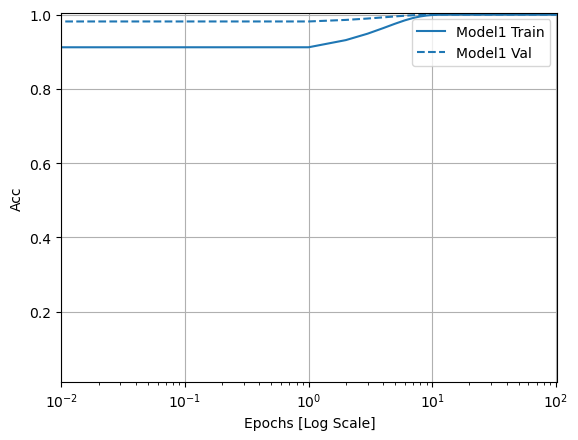

In [27]:
plotter = tfdocs.plots.HistoryPlotter(metric = 'acc', smoothing_std=10)
plotter.plot(size_histories)
a = plt.xscale('log')

plt.xlim([.01, max(plt.xlim())])
plt.ylim([.01, max(plt.ylim())])
plt.xlabel("Epochs [Log Scale]")

In [28]:
loss, acc = model1.evaluate(X_test, y_test)
print(f"Model Loss (Test Set) : {loss}")
print(f"Model Accuracy (Test Set): {acc}")

31/31 [==============================] - 0s 3ms/step - loss: 2.3389e-04 - acc: 1.0000
Model Loss (Test Set) : 0.00023389053239952773
Model Accuracy (Test Set): 1.0


#### Model 2

In [29]:
model2_history = compile_and_fit(
    model2, 
    'models/model2',
    loss=LOSS,
    metrics=['acc']
)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 41)                5453      
                                                                 
 dense_3 (Dense)             (None, 41)                1722      
                                                                 
 dense_4 (Dense)             (None, 41)                1722      
                                                                 
Total params: 8,897
Trainable params: 8,897
Non-trainable params: 0
_________________________________________________________________

Epoch: 0, acc:0.5768,  loss:3.0182,  val_acc:0.9695,  val_loss:2.1660,  
....................................................................................................
Epoch: 100, acc:1.0000,  loss:0.0001,  val_acc:1.0000,  val_loss:0.0000,  
....

In [30]:
size_histories['model2'] = model2_history

Text(0.5, 0, 'Epochs [Log Scale]')

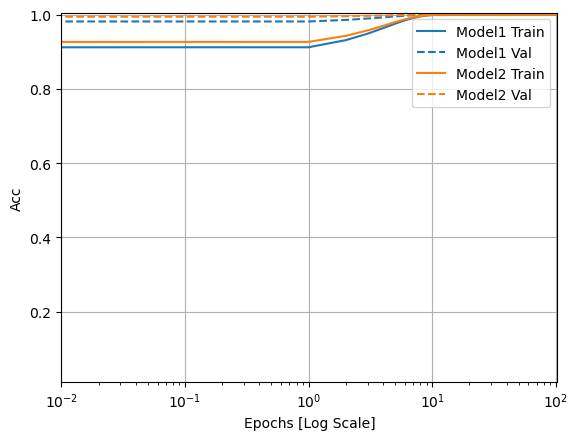

In [31]:
plotter = tfdocs.plots.HistoryPlotter(metric = 'acc', smoothing_std=10)
plotter.plot(size_histories)
a = plt.xscale('log')

plt.xlim([.01, max(plt.xlim())])
plt.ylim([.01, max(plt.ylim())])
plt.xlabel("Epochs [Log Scale]")

#### Model 3

In [32]:
model3_history = compile_and_fit(
    model3, 
    'models/model3',
    loss=LOSS,
    metrics=['acc']
)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 64)                8512      
                                                                 
 dense_6 (Dense)             (None, 64)                4160      
                                                                 
 dense_7 (Dense)             (None, 64)                4160      
                                                                 
 dense_8 (Dense)             (None, 41)                2665      
                                                                 
Total params: 19,497
Trainable params: 19,497
Non-trainable params: 0
_________________________________________________________________

Epoch: 0, acc:0.6973,  loss:2.4175,  val_acc:1.0000,  val_loss:0.9188,  
....................................................................................................
Epoch: 

In [33]:

size_histories['model3'] = model3_history

Text(0.5, 0, 'Epochs [Log Scale]')

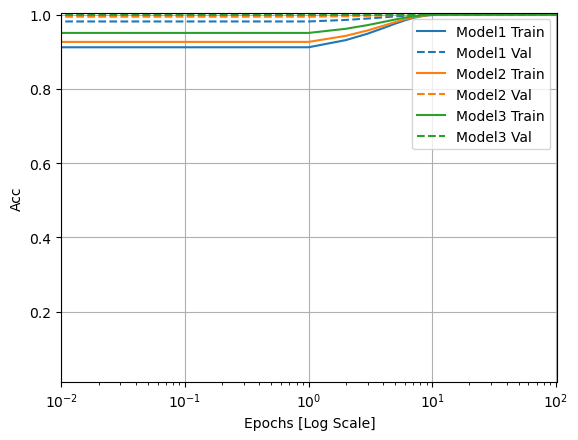

In [34]:
plotter = tfdocs.plots.HistoryPlotter(metric = 'acc', smoothing_std=10)
plotter.plot(size_histories)
a = plt.xscale('log')

plt.xlim([.01, max(plt.xlim())])
plt.ylim([.01, max(plt.ylim())])
plt.xlabel("Epochs [Log Scale]")

#### Model 4

In [35]:
model4_history = compile_and_fit(
    model4, 
    'models/model4',
    loss=LOSS,
    metrics=['acc']
)


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 64)                8512      
                                                                 
 dense_10 (Dense)            (None, 64)                4160      
                                                                 
 dense_11 (Dense)            (None, 64)                4160      
                                                                 
 dense_12 (Dense)            (None, 64)                4160      
                                                                 
 dense_13 (Dense)            (None, 41)                2665      
                                                                 
Total params: 23,657
Trainable params: 23,657
Non-trainable params: 0
_________________________________________________________________

Epoch: 0, acc:0.7383,  loss:2.1772,  val_acc:0.99

In [36]:

size_histories['model4'] = model4_history

Text(0.5, 0, 'Epochs [Log Scale]')

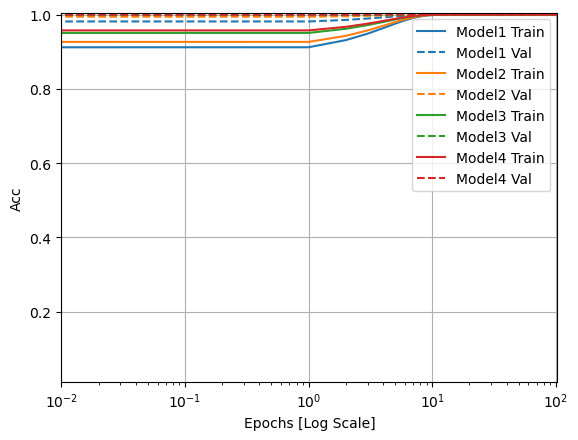

In [37]:
plotter = tfdocs.plots.HistoryPlotter(metric = 'acc', smoothing_std=10)
plotter.plot(size_histories)
a = plt.xscale('log')

plt.xlim([.01, max(plt.xlim())])
plt.ylim([.01, max(plt.ylim())])
plt.xlabel("Epochs [Log Scale]")

#### Model 5

In [38]:
model5_history = compile_and_fit(
    model5, 
    'models/model5',
    loss=LOSS,
    metrics=['acc']
)

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_14 (Dense)            (None, 32)                4256      
                                                                 
 dense_15 (Dense)            (None, 32)                1056      
                                                                 
 dense_16 (Dense)            (None, 32)                1056      
                                                                 
 dense_17 (Dense)            (None, 32)                1056      
                                                                 
 dense_18 (Dense)            (None, 32)                1056      
                                                                 
 dense_19 (Dense)            (None, 41)                1353      
                                                                 
Total params: 9,833
Trainable params: 9,833
Non-traina

In [39]:

size_histories['model5'] = model5_history

### 3. Evaluate Model

#### Evaluate with test data

In [40]:
loss1, acc1 = model1.evaluate(X_test, y_test)
loss2, acc2 = model2.evaluate(X_test, y_test)
loss3, acc3 = model3.evaluate(X_test, y_test)
loss4, acc4 = model4.evaluate(X_test, y_test)
loss5, acc5 = model5.evaluate(X_test, y_test)

print("Evaluation with Test Data")
pd.DataFrame({"Model 1": [loss1, acc1], "Model 2": [loss2, acc2], "Model 3": [loss3, acc3], "Model 4": [loss4, acc4], "Model 5": [loss5, acc5]}, index=['loss', 'accuracy'])


31/31 [==============================] - 0s 3ms/step - loss: 8.0401e-06 - acc: 1.0000
Evaluation with Test Data


,Model 1,Model 2,Model 3,Model 4,Model 5
loss,0.000234,0.000055,0.000013,0.000006,0.000008
accuracy,1.000000,1.000000,1.000000,1.000000,1.000000


#### Evaluate with unseen data (Loss vs Accuracy)

In [41]:

loss1, acc1 = model1.evaluate(X_unseen, y_unseen)
loss2, acc2 = model2.evaluate(X_unseen, y_unseen)
loss3, acc3 = model3.evaluate(X_unseen, y_unseen)
loss4, acc4 = model4.evaluate(X_unseen, y_unseen)
loss5, acc5 = model5.evaluate(X_unseen, y_unseen)
print("Evaluation with Unseen Data")

# display result 
pd.DataFrame({"Model 1": [loss1, acc1], "Model 2": [loss2, acc2], "Model 3": [loss3, acc3], "Model 4": [loss4, acc4], "Model 5": [loss5, acc5]}, index=['loss', 'accuracy'])

2/2 [==============================] - 0s 5ms/step - loss: 0.3856 - acc: 0.9762
Evaluation with Unseen Data


,Model 1,Model 2,Model 3,Model 4,Model 5
loss,0.025761,0.165167,0.126661,0.130477,0.385617
accuracy,0.976190,0.976190,0.976190,0.976190,0.976190


#### Evaluation with Test Set

In [42]:
def test_prediction(model, X, y):
    predictions = model.predict(X)
    predicted=tf.argmax(predictions, axis=1)
    #result= pd.DataFrame({'Test':y, 'Predicted':predicted})
    return predicted

predicted11 = test_prediction(model1, X_test, y_test)
predicted12 = test_prediction(model2, X_test, y_test)
predicted13 = test_prediction(model3, X_test, y_test)
predicted14 = test_prediction(model4, X_test, y_test)
predicted15 = test_prediction(model5, X_test, y_test)

# display result
pd.DataFrame({"Expected": y_test, "Model 1": predicted11, "Model 2": predicted12, "Model 3": predicted13, "Model 4": predicted14, "Model 5": predicted15})

31/31 [==============================] - 0s 2ms/step


,Expected,Model 1,Model 2,Model 3,Model 4,Model 5
4007,39,39,39,39,39,39
1938,18,18,18,18,18,18
4462,31,31,31,31,31,31
3227,18,18,18,18,18,18
3889,5,5,5,5,5,5
...,...,...,...,...,...,...
111,30,30,30,30,30,30
3741,23,23,23,23,23,23
3280,15,15,15,15,15,15
3687,38,38,38,38,38,38


#### Unseen Test Data

In [43]:
predicted21 = test_prediction(model1, X_unseen, y_unseen)
predicted22 = test_prediction(model2, X_unseen, y_unseen)
predicted23 = test_prediction(model3, X_unseen, y_unseen)
predicted24 = test_prediction(model4, X_unseen, y_unseen)
predicted25 = test_prediction(model5, X_unseen, y_unseen)


# display result
pd.DataFrame({"Expected": class_names[y_unseen], "Model 1": class_names[predicted21], "Model 2": class_names[predicted22], "Model 3": class_names[predicted23], "Model 4": class_names[predicted24], "Model 5": class_names[predicted25]})

2/2 [==============================] - 0s 4ms/step


,Expected,Model 1,Model 2,Model 3,Model 4,Model 5
0,Fungal infection,Fungal infection,Fungal infection,Fungal infection,Fungal infection,Fungal infection
1,Allergy,Allergy,Allergy,Allergy,Allergy,Allergy
2,GERD,GERD,GERD,GERD,GERD,GERD
3,Chronic cholestasis,Chronic cholestasis,Chronic cholestasis,Chronic cholestasis,Chronic cholestasis,Chronic cholestasis
4,Drug Reaction,Drug Reaction,Drug Reaction,Drug Reaction,Drug Reaction,Drug Reaction
5,Peptic ulcer diseae,Peptic ulcer diseae,Peptic ulcer diseae,Peptic ulcer diseae,Peptic ulcer diseae,Peptic ulcer diseae
6,AIDS,AIDS,AIDS,AIDS,AIDS,AIDS
7,Diabetes,Diabetes,Diabetes,Diabetes,Diabetes,Diabetes
8,Gastroenteritis,Gastroenteritis,Gastroenteritis,Gastroenteritis,Gastroenteritis,Gastroenteritis
9,Bronchial Asthma,Bronchial Asthma,Bronchial Asthma,Bronchial Asthma,Bronchial Asthma,Bronchial Asthma


### Confusion Matrix

In [44]:
#!pip install tensorflow_addons
#!pip install git+https://github.com/tensorflow/docs

import tensorflow_addons as tfa
#from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

#### Accuracy Score

In [45]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

acc_score11 = accuracy_score(y_test, predicted11)
acc_score12 = accuracy_score(y_test, predicted12)
acc_score13 = accuracy_score(y_test, predicted13)
acc_score14 = accuracy_score(y_test, predicted14)
acc_score15 = accuracy_score(y_test, predicted15)

acc_score21 = accuracy_score(y_unseen, predicted21)
acc_score22 = accuracy_score(y_unseen, predicted22)
acc_score23 = accuracy_score(y_unseen, predicted23)
acc_score24 = accuracy_score(y_unseen, predicted24)
acc_score25 = accuracy_score(y_unseen, predicted25)

In [46]:
# display accuracy score
print("Accuracy Score - Test Data")
df = pd.DataFrame(columns=['Data', 'Model 1', 'Model 2', 'Model 3', 'Model 4', 'Model 5'])
df.loc[0] = ['Test', acc_score11, acc_score12, acc_score13, acc_score14, acc_score15]
df.loc[1] = ['Unseen', acc_score21, acc_score22, acc_score23, acc_score24, acc_score25]
df

Accuracy Score - Test Data


,Data,Model 1,Model 2,Model 3,Model 4,Model 5
0,Test,1.00000,1.00000,1.00000,1.00000,1.00000
1,Unseen,0.97619,0.97619,0.97619,0.97619,0.97619


### Multilabel confusion matrix

In [47]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, predicted11)
confusion_matrix(y_test, predicted12)

array([[21,  0,  0, ...,  0,  0,  0],
       [ 0, 23,  0, ...,  0,  0,  0],
       [ 0,  0, 25, ...,  0,  0,  0],
       ...,
       [ 0,  0,  0, ..., 19,  0,  0],
       [ 0,  0,  0, ...,  0, 27,  0],
       [ 0,  0,  0, ...,  0,  0, 18]], dtype=int64)

In [48]:
X_unseen.shape

(42, 132)

Model 4:
2/2 [==============================] - 0s 4ms/step


<Axes: >

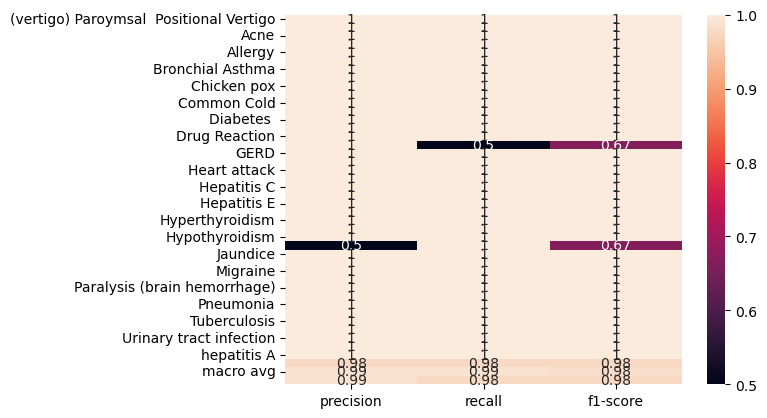

In [49]:
from sklearn.metrics import classification_report
import seaborn as sns

print("Model 4:")
p = model4.predict(X_unseen)
clf_report  = classification_report(y_unseen, tf.argmax(p, axis=1),target_names=class_names, output_dict=True)

sns.heatmap(pd.DataFrame(clf_report).iloc[:-1, :].T, annot=True)


In [50]:
#### Print confusion matrix

Model 4:


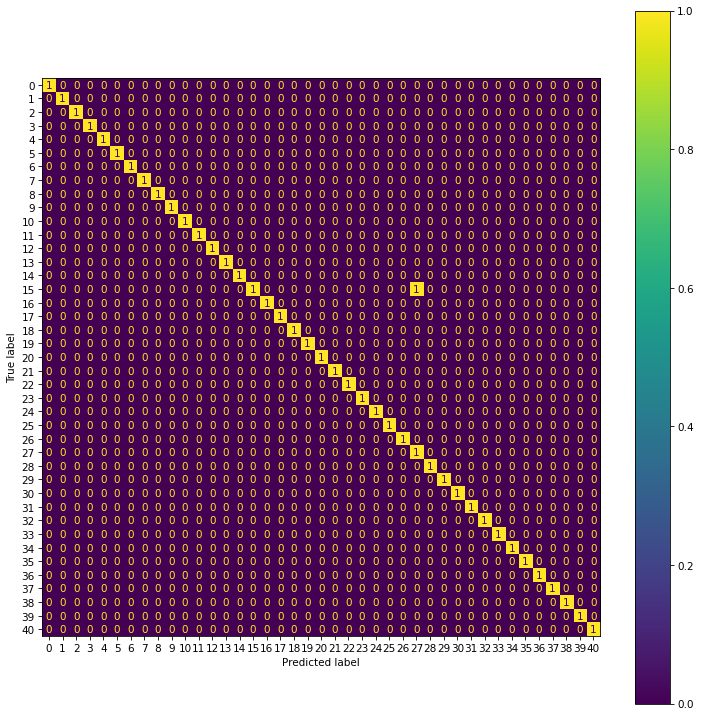

In [51]:
figsize=[12,12]
print("Model 4:")
cm = confusion_matrix(y_unseen, predicted24) 
cm_display = ConfusionMatrixDisplay(cm).plot(ax=plt.subplots(figsize=figsize, dpi=75)[1])


In [52]:
#fig, axn = plt.subplots(3,3, sharex=True, sharey=True,figsize=(12,12))

#for i, ax in enumerate(axn.flat):
#    k = list(cf_matrix)[i]
#    sns.heatmap(cf_matrix[k], ax=ax,cbar=i==4)
#    ax.set_title(k,fontsize=8)
